In [9]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=d0666656f9c6fc7bfbf7048e05b5fdd5f995fdf658244d29389a027da7e18e79
  Stored in directory: c:\users\tbrac\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [6]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [9]:
#Beginning Data Retrieval
print("Beginning Data Retrieval ")
print("-----------------------------")
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : katobu
Processing Record 2 of Set 1 : fort saint james
Processing Record 3 of Set 1 : hithadhoo
Processing Record 4 of Set 1 : airai
Processing Record 5 of Set 1 : mokhsogollokh
Processing Record 6 of Set 1 : pacific grove
Processing Record 7 of Set 1 : valparaiso
Processing Record 8 of Set 1 : hermanus
Processing Record 9 of Set 1 : ust-ishim
Processing Record 10 of Set 1 : east london
Processing Record 11 of Set 1 : ayagoz
Processing Record 12 of Set 1 : ucluelet
Processing Record 13 of Set 1 : busselton
Processing Record 14 of Set 1 : guerrero negro
Processing Record 15 of Set 1 : honningsvag
Processing Record 16 of Set 1 : rikitea
Processing Record 17 of Set 1 : ushuaia
Processing Record 18 of Set 1 : port elizabeth
Processing Record 19 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 20 of Set 1 : palana
Processing Record 21 of Set 1 : lorengau
Processing Record 22 of Set 1 

Processing Record 31 of Set 4 : klaksvik
City not found. Skipping...
Processing Record 32 of Set 4 : luwuk
Processing Record 33 of Set 4 : nalut
Processing Record 34 of Set 4 : berlevag
Processing Record 35 of Set 4 : senno
Processing Record 36 of Set 4 : talnakh
Processing Record 37 of Set 4 : santa cruz
Processing Record 38 of Set 4 : severo-kurilsk
Processing Record 39 of Set 4 : te anau
Processing Record 40 of Set 4 : madera
Processing Record 41 of Set 4 : abu dhabi
Processing Record 42 of Set 4 : vila franca do campo
Processing Record 43 of Set 4 : yerbogachen
Processing Record 44 of Set 4 : leningradskiy
Processing Record 45 of Set 4 : calabozo
Processing Record 46 of Set 4 : toul
Processing Record 47 of Set 4 : chiredzi
Processing Record 48 of Set 4 : laguna
Processing Record 49 of Set 4 : lovington
Processing Record 50 of Set 4 : kaabong
Processing Record 0 of Set 5 : nambucca heads
Processing Record 1 of Set 5 : hasaki
Processing Record 2 of Set 5 : lebu
City not found. Skippi

Processing Record 16 of Set 8 : gat
Processing Record 17 of Set 8 : pangnirtung
Processing Record 18 of Set 8 : ulaangom
Processing Record 19 of Set 8 : terralba
Processing Record 20 of Set 8 : whitehorse
Processing Record 21 of Set 8 : soyaux
Processing Record 22 of Set 8 : necochea
Processing Record 23 of Set 8 : ratnagiri
City not found. Skipping...
Processing Record 24 of Set 8 : margate
Processing Record 25 of Set 8 : toamasina
Processing Record 26 of Set 8 : solginskiy
Processing Record 27 of Set 8 : yantal
Processing Record 28 of Set 8 : kangaatsiaq
Processing Record 29 of Set 8 : tsilna
Processing Record 30 of Set 8 : olafsvik
Processing Record 31 of Set 8 : kandrian
Processing Record 32 of Set 8 : walvis bay
Processing Record 33 of Set 8 : kuytun
Processing Record 34 of Set 8 : butembo
Processing Record 35 of Set 8 : navirai
Processing Record 36 of Set 8 : guasdualito
Processing Record 37 of Set 8 : khetia
Processing Record 38 of Set 8 : namibe
Processing Record 39 of Set 8 : 

In [10]:
#creating database from pulled information
weather_df = pd.DataFrame({
    "City": city_name_list,
    "Cloudiness" : cloudiness_list,
    "Country" : country_list,
    "Date" : date_list,
    "Humidity" : humidity_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Wind Speed" : wind_speed_list
})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katobu,35,ID,1627749343,94,-4.9408,122.5276,73.44,2.51
1,Fort Saint James,0,CA,1627749343,37,54.4333,-124.2500,77.58,2.24
2,Hithadhoo,92,MV,1627749343,73,-0.6000,73.0833,81.68,5.21
3,Airai,27,TL,1627749343,92,-8.9266,125.4092,57.49,3.02
4,Mokhsogollokh,0,RU,1627749344,61,61.4681,128.9203,54.81,2.55


In [11]:
weather_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

Analysis: As you get closer to the equator (latitude = 0) the temperatures rise. This is a pretty normal bell shaped curve


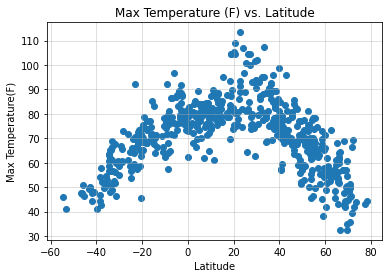

In [12]:
#Plotting Scatter Plot of Temperature vs Latitude
lat = weather_df['Lat']
temp = weather_df['Max Temp']
plt.scatter(lat, temp)
plt.title("Max Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(alpha=.5)
plt.savefig("../Images/Max Temp vs Latitude.png")
print("Analysis: As you get closer to the equator (latitude = 0) the temperatures rise. This is a pretty normal bell shaped curve")

Analysis: The regions closer to the equator seem to have higher average levels of humidity.The further away, the more dispersed the data is.


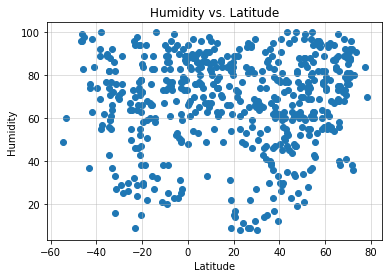

In [13]:
#Plotting Humidity vs Latitude
humidity = weather_df['Humidity']
plt.scatter(lat, humidity)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.5)
plt.savefig("../Images/Max Temp vs Humidity.png")
print("Analysis: The regions closer to the equator seem to have higher average levels of humidity.The further away, the more dispersed the data is.")

Analysis: There seems to be no correlation between latitude and how cloudy a city is.


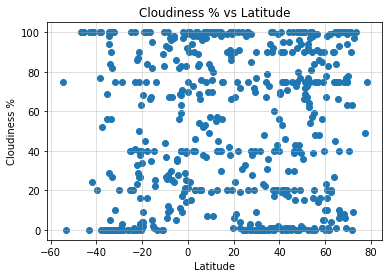

In [14]:
#Plotting Cloudiness vs Latitude
cloudiness = weather_df['Cloudiness']
plt.scatter(lat, cloudiness)
plt.title("Cloudiness % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(alpha=.5)
plt.savefig("../Images/Cloudiness vs Latitude")
print("Analysis: There seems to be no correlation between latitude and how cloudy a city is.")

Analysis: The majority of the cities pulled seem to be under 10mph average. The higher wind speeds are in the lower portion of the northern hemisphere or the southern hemispher.


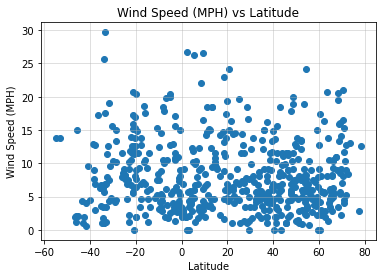

In [15]:
#Plotting Windspeed vs Latitude
wind_speed = weather_df['Wind Speed']
plt.scatter(lat, wind_speed)
plt.title("Wind Speed (MPH) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(alpha=.5)
plt.savefig("../Images/Wind Speed vs Latitude")
print("Analysis: The majority of the cities pulled seem to be under 10mph average. The higher wind speeds are in the lower portion of the northern hemisphere or the southern hemispher.")

In [16]:
northern_hemisphere_df = weather_df.loc[weather_df['Lat'] >=0]
southern_hemisphere_df = weather_df.loc[weather_df['Lat'] <0]

In [17]:
northern_hemisphere_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Fort Saint James,0,CA,1627749343,37,54.4333,-124.2500,77.58,2.24
4,Mokhsogollokh,0,RU,1627749344,61,61.4681,128.9203,54.81,2.55
5,Pacific Grove,90,US,1627749120,89,36.6177,-121.9166,69.46,5.01
8,Ust'-Ishim,16,RU,1627749345,95,57.6935,71.1665,55.26,3.67
10,Ayagoz,80,KZ,1627749345,25,47.9714,80.4392,62.94,5.32
11,Ucluelet,20,CA,1627749295,74,48.9329,-125.5528,55.71,7.47
13,Guerrero Negro,38,MX,1627749345,56,27.9769,-114.0611,79.95,7.85
14,Honningsvåg,100,NO,1627749346,92,70.9821,25.9704,46.00,15.35
19,Palana,5,RU,1627749191,77,59.1167,159.9667,38.30,2.28
21,Los Llanos de Aridane,20,ES,1627749347,81,28.6585,-17.9182,74.12,18.41


In [18]:
southern_hemisphere_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katobu,35,ID,1627749343,94,-4.9408,122.5276,73.44,2.51
2,Hithadhoo,92,MV,1627749343,73,-0.6000,73.0833,81.68,5.21
3,Airai,27,TL,1627749343,92,-8.9266,125.4092,57.49,3.02
6,Valparaíso,100,CL,1627749344,66,-33.0393,-71.6273,61.03,3.44
7,Hermanus,100,ZA,1627749344,82,-34.4187,19.2345,60.91,1.72
9,East London,0,ZA,1627749209,37,-33.0153,27.9116,68.94,6.91
12,Busselton,90,AU,1627749326,77,-33.6500,115.3333,51.08,29.68
15,Rikitea,41,PF,1627749346,70,-23.1203,-134.9692,70.63,10.13
16,Ushuaia,75,AR,1627749336,49,-54.8000,-68.3000,46.06,13.80
17,Port Elizabeth,0,ZA,1627749346,59,-33.9180,25.5701,65.10,5.75


In [39]:
#creating linear regression function
def linear_regression(x, y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    return line_equation
#function for annotating regression line
def annotate(line_equation, a, b):
    plt.annotate(line_equation,(a,b),fontsize=15,color="black")

The r-squared is : -0.67


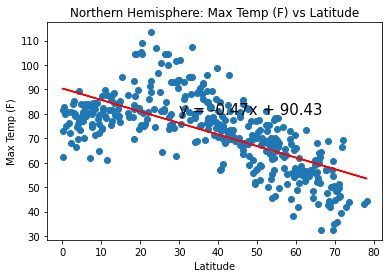

In [41]:
#Northern Hemisphere: Temp vs Latitude
equation1 = linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'])
annotate(equation1, 30, 80)
plt.title("Northern Hemisphere: Max Temp (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Northern Hemisphere Temp vs Lat.png")

The r-squared is : 0.84


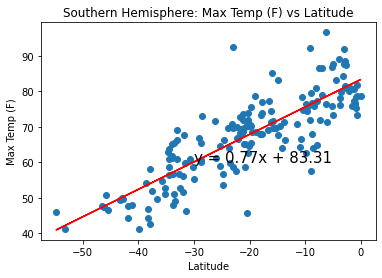

In [43]:
#Southern Hemisphere: Temp vs Latitude
equation2 = linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'])
annotate(equation2, -30, 60)
plt.title("Southern Hemisphere: Max Temp (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere Temp vs Lat.png")

The r-squared is : 0.0


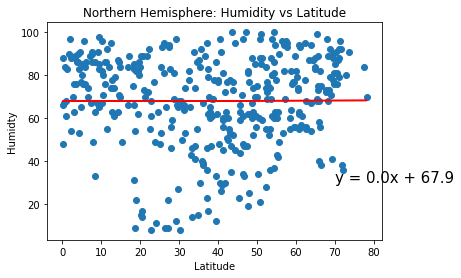

In [47]:
#Northern Hemisphere Humidty vs Latitude
equation3 = linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'])
annotate(equation3, 70, 30)
plt.title("Northern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.savefig("../Images/Northern Hemisphere Humidity vs Lat.png")

The r-squared is : -0.01


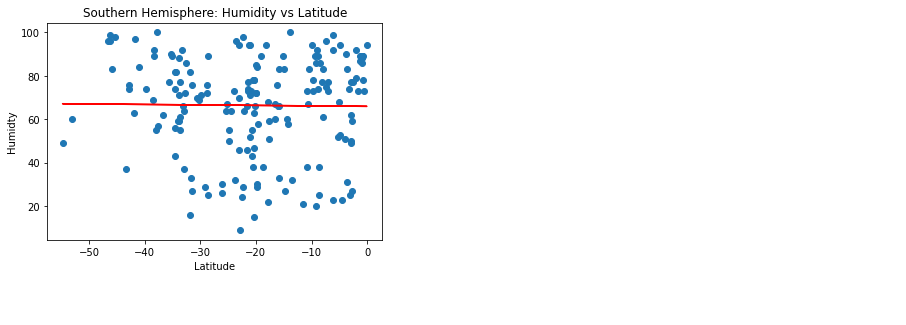

In [50]:
#Southern Hemisphere: Humidty vs Latitude
equation4 = linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'])
annotate(equation4, 70, -30)
plt.title("Southern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.savefig("../Images/Southern Hemisphere Humidity vs Lat.png")

The r-squared is : -0.02


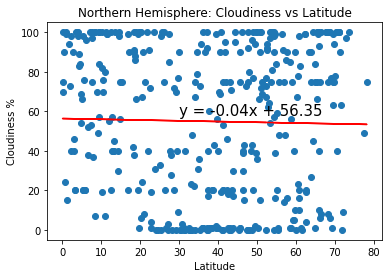

In [53]:
#Northern Hemisphere Cloudiness vs Latitude
equation5 = linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'])
annotate(equation5, 30, 58)
plt.title("Northern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("../Images/Northern Hemisphere Cloudiness vs Lat.png")

The r-squared is : -0.03


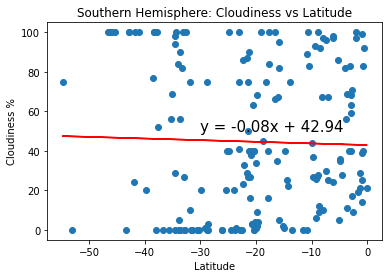

In [55]:
equation6 = linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'])
annotate(equation6, -30, 50)
plt.title("Southern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("../Images/Southern Hemisphere Cloudiness vs Lat.png")

The r-squared is : 0.0


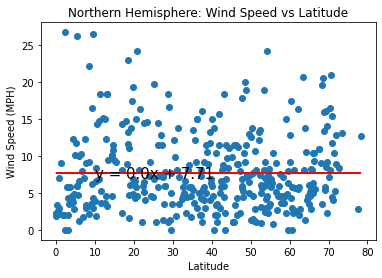

In [59]:
#Northern Hemisphere: Wind Speed vs Lat
equation7 = linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'])
annotate(equation7, 10, 7)
plt.title("Northern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../Images/Northern Hemisphere Wind vs Lat.png")

The r-squared is : 0.03


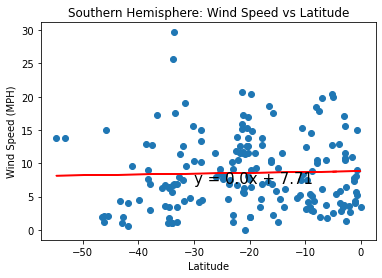

In [61]:
equation8 = linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'])
annotate(equation7, -30, 7)
plt.title("Southern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../Images/Southern Hemisphere Wind vs Lat.png")